### Importación de datos



In [15]:
import pandas as pd
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [16]:
ingreso_tienda1 = tienda['Precio'].sum()
ingreso_tienda2 = tienda2['Precio'].sum()
ingreso_tienda3 = tienda3['Precio'].sum()
ingreso_tienda4 = tienda4['Precio'].sum()


print(f"Ingreso total Tienda 1: {ingreso_tienda1}")
print(f"Ingreso total Tienda 2: {ingreso_tienda2}")
print(f"Ingreso total Tienda 3: {ingreso_tienda3}")
print(f"Ingreso total Tienda 4: {ingreso_tienda4}")

Ingreso total Tienda 1: 1150880400.0
Ingreso total Tienda 2: 1116343500.0
Ingreso total Tienda 3: 1098019600.0
Ingreso total Tienda 4: 1038375700.0


# 2. Ventas por categoría

In [8]:
ventas_categoria_tienda1 = tienda.groupby('Categoría del Producto')['Producto'].count().reset_index()
ventas_categoria_tienda2 = tienda2.groupby('Categoría del Producto')['Producto'].count().reset_index()
ventas_categoria_tienda3 = tienda3.groupby('Categoría del Producto')['Producto'].count().reset_index()
ventas_categoria_tienda4 = tienda4.groupby('Categoría del Producto')['Producto'].count().reset_index()


ventas_categoria_tienda1.columns = ['Categoría', 'Cantidad Vendida']
ventas_categoria_tienda2.columns = ['Categoría', 'Cantidad Vendida']
ventas_categoria_tienda3.columns = ['Categoría', 'Cantidad Vendida']
ventas_categoria_tienda4.columns = ['Categoría', 'Cantidad Vendida']


print("Ventas por categoría - Tienda 1:")
print(ventas_categoria_tienda1)
print("\nVentas por categoría - Tienda 2:")
print(ventas_categoria_tienda2)
print("\nVentas por categoría - Tienda 3:")
print(ventas_categoria_tienda3)
print("\nVentas por categoría - Tienda 4:")
print(ventas_categoria_tienda4)

Ventas por categoría - Tienda 1:
                 Categoría  Cantidad Vendida
0  Artículos para el hogar               171
1     Deportes y diversión               284
2        Electrodomésticos               312
3             Electrónicos               448
4   Instrumentos musicales               182
5                 Juguetes               324
6                   Libros               173
7                  Muebles               465

Ventas por categoría - Tienda 2:
                 Categoría  Cantidad Vendida
0  Artículos para el hogar               181
1     Deportes y diversión               275
2        Electrodomésticos               305
3             Electrónicos               422
4   Instrumentos musicales               224
5                 Juguetes               313
6                   Libros               197
7                  Muebles               442

Ventas por categoría - Tienda 3:
                 Categoría  Cantidad Vendida
0  Artículos para el hogar               177

# 3. Calificación promedio de la tienda


In [10]:
calificacion_promedio_tienda1 = tienda['Calificación'].mean()
calificacion_promedio_tienda2 = tienda2['Calificación'].mean()
calificacion_promedio_tienda3 = tienda3['Calificación'].mean()
calificacion_promedio_tienda4 = tienda4['Calificación'].mean()


print(f"Calificación promedio Tienda 1: {calificacion_promedio_tienda1:.2f}")
print(f"Calificación promedio Tienda 2: {calificacion_promedio_tienda2:.2f}")
print(f"Calificación promedio Tienda 3: {calificacion_promedio_tienda3:.2f}")
print(f"Calificación promedio Tienda 4: {calificacion_promedio_tienda4:.2f}")

Calificación promedio Tienda 1: 3.98
Calificación promedio Tienda 2: 4.04
Calificación promedio Tienda 3: 4.05
Calificación promedio Tienda 4: 4.00


# 4. Productos más y menos vendidos

In [12]:
def productos_vendidos(tienda):
    productos_contados = tienda.groupby('Producto')['Producto'].count().reset_index(name='Cantidad Vendida')
    producto_mas_vendido = productos_contados.loc[productos_contados['Cantidad Vendida'].idxmax()]
    producto_menos_vendido = productos_contados.loc[productos_contados['Cantidad Vendida'].idxmin()]
    return producto_mas_vendido, producto_menos_vendido

mas_vendido_tienda1, menos_vendido_tienda1 = productos_vendidos(tienda)
mas_vendido_tienda2, menos_vendido_tienda2 = productos_vendidos(tienda2)
mas_vendido_tienda3, menos_vendido_tienda3 = productos_vendidos(tienda3)
mas_vendido_tienda4, menos_vendido_tienda4 = productos_vendidos(tienda4)


print("Tienda 1:")
print(f"Producto más vendido: {mas_vendido_tienda1['Producto']} - Cantidad: {mas_vendido_tienda1['Cantidad Vendida']}")
print(f"Producto menos vendido: {menos_vendido_tienda1['Producto']} - Cantidad: {menos_vendido_tienda1['Cantidad Vendida']}\n")

print("Tienda 2:")
print(f"Producto más vendido: {mas_vendido_tienda2['Producto']} - Cantidad: {mas_vendido_tienda2['Cantidad Vendida']}")
print(f"Producto menos vendido: {menos_vendido_tienda2['Producto']} - Cantidad: {menos_vendido_tienda2['Cantidad Vendida']}\n")


print("Tienda 3:")
print(f"Producto más vendido: {mas_vendido_tienda3['Producto']} - Cantidad: {mas_vendido_tienda3['Cantidad Vendida']}")
print(f"Producto menos vendido: {menos_vendido_tienda3['Producto']} - Cantidad: {menos_vendido_tienda3['Cantidad Vendida']}\n")


print("Tienda 4:")
print(f"Producto más vendido: {mas_vendido_tienda4['Producto']} - Cantidad: {mas_vendido_tienda4['Cantidad Vendida']}")
print(f"Producto menos vendido: {menos_vendido_tienda4['Producto']} - Cantidad: {menos_vendido_tienda4['Cantidad Vendida']}\n")

Tienda 1:
Producto más vendido: Armario - Cantidad: 60
Producto menos vendido: Auriculares con micrófono - Cantidad: 33

Tienda 2:
Producto más vendido: Iniciando en programación - Cantidad: 65
Producto menos vendido: Juego de mesa - Cantidad: 32

Tienda 3:
Producto más vendido: Kit de bancas - Cantidad: 57
Producto menos vendido: Bloques de construcción - Cantidad: 35

Tienda 4:
Producto más vendido: Cama box - Cantidad: 62
Producto menos vendido: Guitarra eléctrica - Cantidad: 33



# 5. Envío promedio por tienda

In [14]:
costo_envio_promedio_tienda1 = tienda['Costo de envío'].mean()
costo_envio_promedio_tienda2 = tienda2['Costo de envío'].mean()
costo_envio_promedio_tienda3 = tienda3['Costo de envío'].mean()
costo_envio_promedio_tienda4 = tienda4['Costo de envío'].mean()


print(f"Costo de envío promedio Tienda 1: {costo_envio_promedio_tienda1:.2f}")
print(f"Costo de envío promedio Tienda 2: {costo_envio_promedio_tienda2:.2f}")
print(f"Costo de envío promedio Tienda 3: {costo_envio_promedio_tienda3:.2f}")
print(f"Costo de envío promedio Tienda 4: {costo_envio_promedio_tienda4:.2f}")

Costo de envío promedio Tienda 1: 26018.61
Costo de envío promedio Tienda 2: 25216.24
Costo de envío promedio Tienda 3: 24805.68
Costo de envío promedio Tienda 4: 23459.46


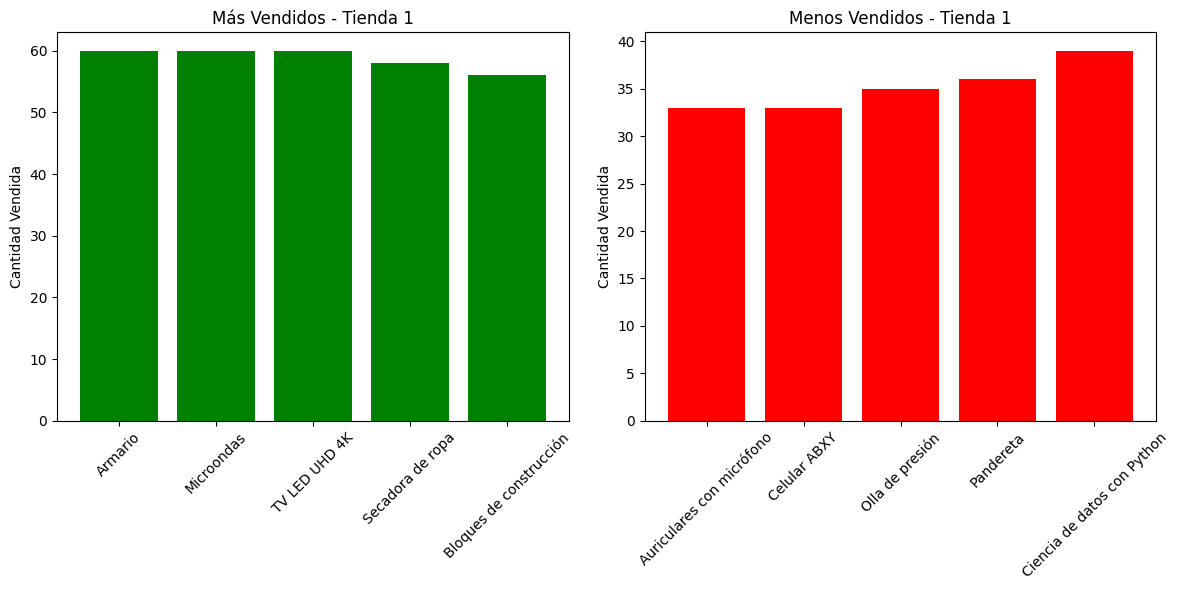

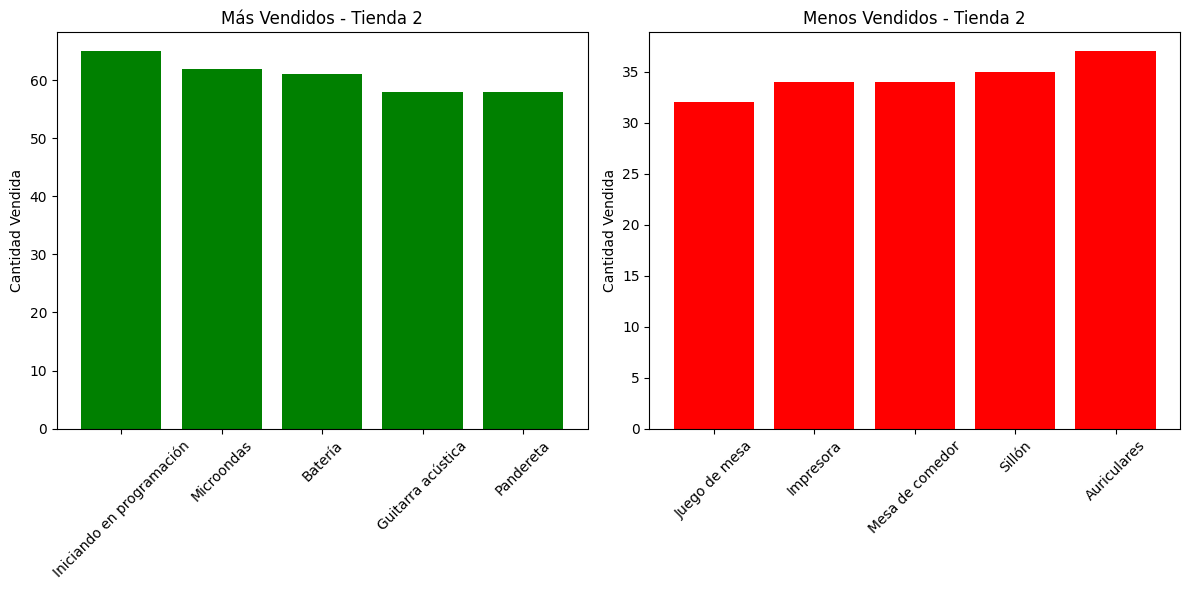

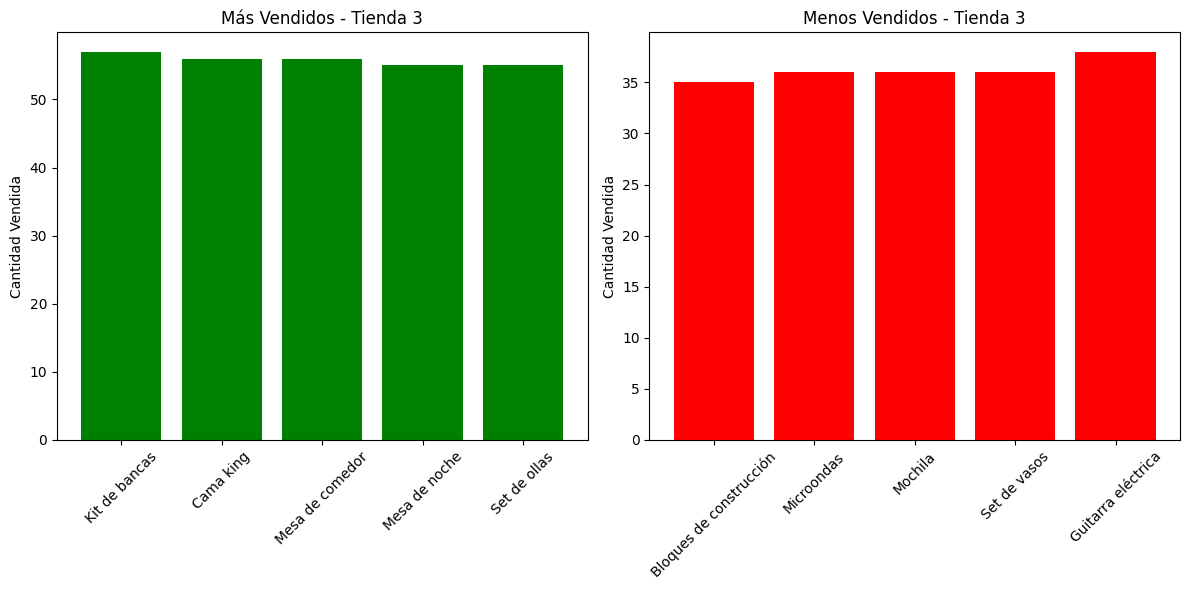

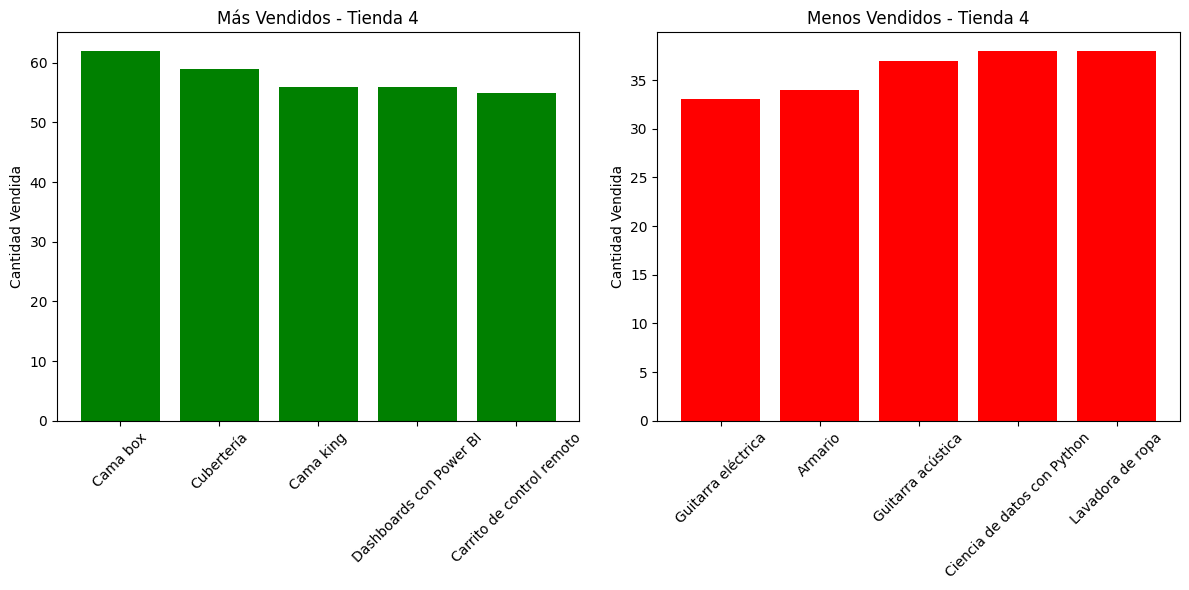

In [17]:
def graficar_productos_vendidos(tienda, nombre_tienda):
    productos_contados = tienda.groupby('Producto')['Producto'].count().reset_index(name='Cantidad Vendida')


    top_productos = productos_contados.nlargest(5, 'Cantidad Vendida')
    bottom_productos = productos_contados.nsmallest(5, 'Cantidad Vendida')
    plt.figure(figsize=(12, 6))


    plt.subplot(1, 2, 1)
    plt.bar(top_productos['Producto'], top_productos['Cantidad Vendida'], color='green')
    plt.title(f'Más Vendidos - {nombre_tienda}')
    plt.xticks(rotation=45)
    plt.ylabel('Cantidad Vendida')



    plt.subplot(1, 2, 2)
    plt.bar(bottom_productos['Producto'], bottom_productos['Cantidad Vendida'], color='red')
    plt.title(f'Menos Vendidos - {nombre_tienda}')
    plt.xticks(rotation=45)
    plt.ylabel('Cantidad Vendida')

    plt.tight_layout()
    plt.show()


graficar_productos_vendidos(tienda, "Tienda 1")
graficar_productos_vendidos(tienda2, "Tienda 2")
graficar_productos_vendidos(tienda3, "Tienda 3")
graficar_productos_vendidos(tienda4, "Tienda 4")

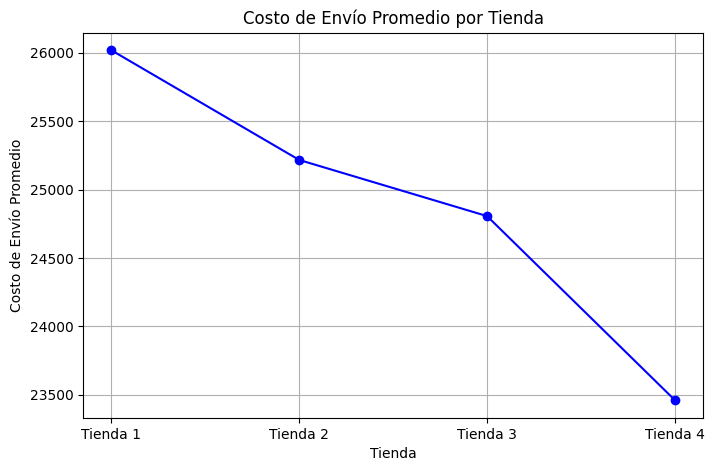

In [18]:
tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']

costos_envio_promedio = [
    costo_envio_promedio_tienda1,
    costo_envio_promedio_tienda2,
    costo_envio_promedio_tienda3,
    costo_envio_promedio_tienda4
]


plt.figure(figsize=(8, 5))
plt.plot(tiendas, costos_envio_promedio, marker='o', color='blue')
plt.title('Costo de Envío Promedio por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Costo de Envío Promedio')
plt.grid()
plt.show()

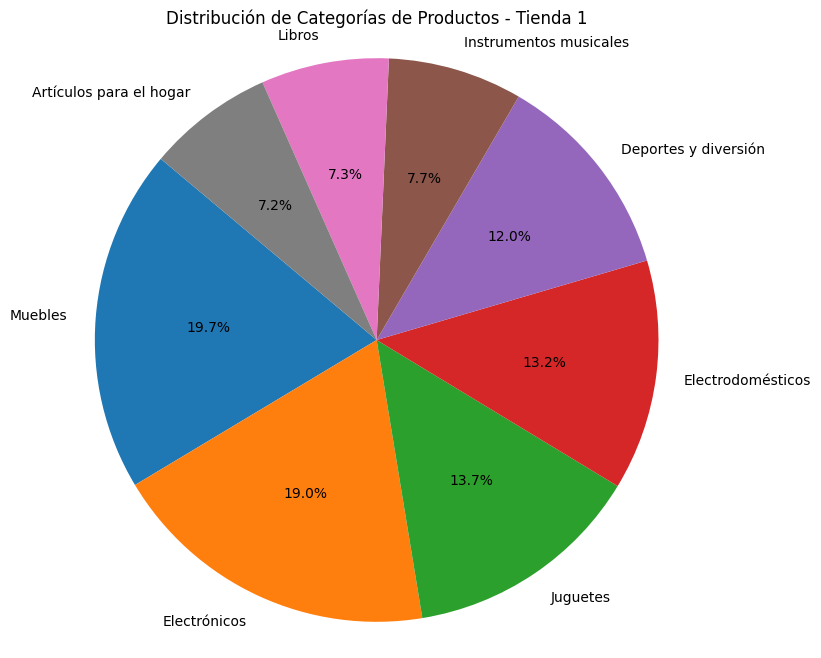

In [20]:
categoria_distribution = tienda['Categoría del Producto'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(categoria_distribution, labels=categoria_distribution.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribución de Categorías de Productos - Tienda 1')
plt.axis('equal')
plt.show()

**INFORME FINAL**

El presente informe tiene como objetivo analizar el desempeño de cuatro tiendas en línea, con el fin de recomendar al Sr. Juan en cuál de ellas debería vender sus productos. Para ello, se han considerado diversos factores, incluyendo los ingresos totales, las categorías de productos más y menos vendidas, las calificaciones promedio de los clientes, los productos más y menos vendidos, y el costo de envío promedio. A través de este análisis, se busca identificar la tienda que ofrece las mejores oportunidades de venta y satisfacción del cliente.

**ANALISIS**

1. Ingresos Totales

Los ingresos totales de cada tienda se calcularon a partir de los precios de los productos vendidos. A continuación, se presentan los ingresos totales:

    Tienda 1: 1150880400.0
    Tienda 2: 1116343500.0
    Tienda 3: 1098019600.0
    Tienda 4: 1038375700.0

2. Categorías de Productos Más y Menos Vendidas

Se realizó un análisis de las categorías de productos más y menos vendidas en cada tienda. Los resultados son los siguientes:

    Tienda 1:
        Más Vendida: [muebles]
        Menos Vendida: [libros]
    Tienda 2:
        Más Vendida: [muebles]
        Menos Vendida: [articulos para el hogar]
    Tienda 3:
        Más Vendida: [muebles]
        Menos Vendida: [instrumentos musicales]
    Tienda 4:
        Más Vendida: [muebles]
        Menos Vendida: [instrumentos musicales]

3. Calificaciones Promedio de los Clientes

Las calificaciones promedio de los clientes para cada tienda son las siguientes:

    Tienda 1: [3,98]
    Tienda 2: [4,04]
    Tienda 3: [4,05]
    Tienda 4: [4,00]

4. Productos Más y Menos Vendidos

Los productos más y menos vendidos en cada tienda son:

    Tienda 1:
        Más Vendido: [Armario] - Cantidad: [60]
        Menos Vendido: [Auriculares con micrófono] - Cantidad: [33]
    Tienda 2:
        Más Vendido: [Iniciando en programación] - Cantidad: [65]
        Menos Vendido: [Juego de mesa] - Cantidad: [32]
    Tienda 3:
        Más Vendido: [Kit de bancas] - Cantidad: [57]
        Menos Vendido: [Bloques de construcción] - Cantidad: [35]
    Tienda 4:
        Más Vendido: [Cama box] - Cantidad: [62]
        Menos Vendido: [Guitarra eléctrica] - Cantidad: [33]

5. Costo de Envío Promedio

El costo de envío promedio para cada tienda es el siguiente:

    Tienda 1: $26018.61
    Tienda 2: $25216.24
    Tienda 3: $24805.68
    Tienda 4: $23459.46
